# Análise de dados - Portal da Transparência

## Carregando os dados



In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/2024_20250928_Viagens/2024_Viagem.csv"
output_path_table = '/content/drive/MyDrive/Colab Notebooks/output/Python Dados/tabela_final.xlsx'
output_path_figure = '/content/drive/MyDrive/Colab Notebooks/output/Python Dados/figura.png'

Importando a tabela

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_viagens = pd.read_csv(file_path, encoding='latin-1', sep=';', decimal=',')

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)

Criando uma nova coluna

In [ ]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens']

Atribuindo variável

In [ ]:
viagens_por_cargo = df_viagens.groupby("Cargo")["Despesas"].sum().reset_index().sort_values("Despesas", ascending=False)

Ajustando valores nulos na coluna de "Cargo"

In [ ]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna("NÃO IDENTIFICADO")

Convertendo colunas de data

In [ ]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format="%d/%m/%Y")

In [ ]:
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

Criando uma tabela consolidada

In [ ]:
df_viagens_consolidadas = (
    df_viagens
    .groupby("Cargo")
    .agg(
        despesas_media=('Despesas', 'mean'),
        duracao_media=('Dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', "count")
        )
    .reset_index()
    .sort_values('despesas_totais', ascending=False)
)

df_cargo = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargo.loc[df_cargo['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidadas['Cargo'].isin(cargos_relevantes)

df_final = df_viagens_consolidadas[filtro].sort_values('n_viagens', ascending=False)

df_final.to_excel(output_path_table)

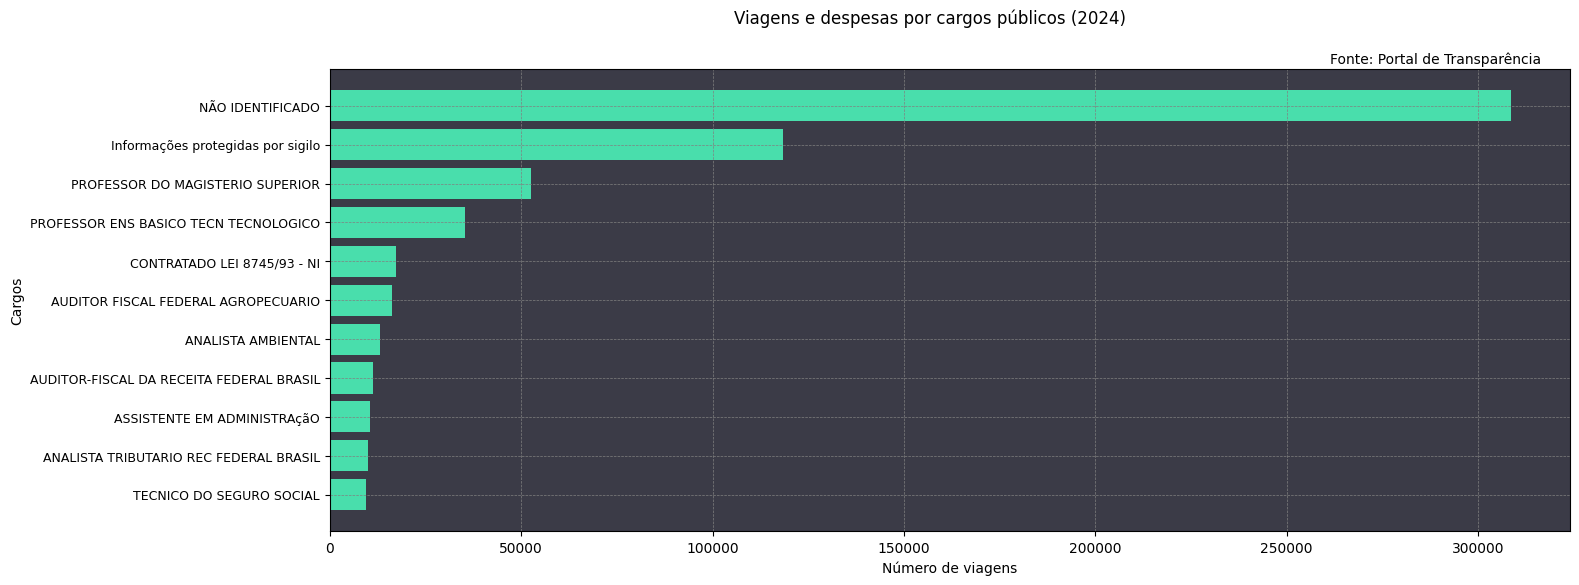

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(df_final['Cargo'], df_final['n_viagens'], color="#49deac")
ax.invert_yaxis()


ax.set_facecolor("#3b3b47")
fig.suptitle("Viagens e despesas por cargos públicos (2024)")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize = 9)
plt.xlabel("Número de viagens")
plt.ylabel("Cargos")
plt.figtext(0.75, 0.89, "Fonte: Portal de Transparência")

plt.savefig(output_path_figure, bbox_inches='tight')